<a href="https://colab.research.google.com/github/anjalirephy-code/GPR_Credit_Analysis/blob/main/Geopolitical_Risk_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Geopolitical Risk Impact on Consumer Credit Behavior

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv("gprdata.csv")
df.head()


Saving gprdata.csv to gprdata.csv


,month,GPR,GPRT,GPRA,GPRH,GPRHT,GPRHA,SHARE_GPR,N10,SHARE_GPRH,...,GPRHC_TUN,GPRHC_TUR,GPRHC_TWN,GPRHC_UKR,GPRHC_USA,GPRHC_VEN,GPRHC_VNM,GPRHC_ZAF,var_name,var_label
0,01-01-1900,NaN,NaN,NaN,87.93,64.72,110.45,NaN,NaN,3.17,...,0.0,0.04,0.0,0.0,2.72,0.05,0.01,1.15,month,Date (year/month)
1,01-02-1900,NaN,NaN,NaN,86.57,71.94,96.25,NaN,NaN,3.12,...,0.0,0.13,0.0,0.0,2.73,0.03,0.00,1.14,GPR,Recent GPR (Index: 1985:2019=100)
2,01-03-1900,NaN,NaN,NaN,72.14,57.48,84.50,NaN,NaN,2.60,...,0.0,0.18,0.0,0.0,2.15,0.03,0.00,0.86,GPRT,Recent GPR Threats (Index: 1985:2019=100)
3,01-04-1900,NaN,NaN,NaN,54.42,37.33,65.86,NaN,NaN,1.96,...,0.0,0.07,0.0,0.0,1.78,0.00,0.00,0.64,GPRA,Recent GPR Acts (Index: 1985:2019=100)
4,01-05-1900,NaN,NaN,NaN,64.41,48.20,74.37,NaN,NaN,2.32,...,0.0,0.08,0.0,0.0,1.97,0.01,0.00,0.79,GPRH,Historical GPR (Index: 1900:2019=100)


In [ ]:
df_selected_cols =df[['month','GPR']]
df_selected_cols.head()

,month,GPR
0,01-01-1900,NaN
1,01-02-1900,NaN
2,01-03-1900,NaN
3,01-04-1900,NaN
4,01-05-1900,NaN


In [ ]:
import pandas as pd
df = pd.read_csv("gprdata.csv")
df['date'] = pd.to_datetime(df['month'], format='%d-%m-%Y')
gpr_df = df.loc[(df['date'] >= '2023-01-01') & (df['date'] <= '2025-08-01'), ['date','GPR',]]
gpr_df.head()

,date,GPR
1476,2023-01-01,104.27
1477,2023-02-01,120.99
1478,2023-03-01,105.38
1479,2023-04-01,106.81
1480,2023-05-01,108.47


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
credit_df = pd.read_csv("creditdata.csv")
credit_df.head()

Saving creditdata.csv to creditdata (1).csv


,observation_date,TOTALSL
0,01-01-2023,4874126.16
1,01-02-2023,4884909.18
2,01-03-2023,4909609.04
3,01-04-2023,4921913.69
4,01-05-2023,4927071.03


In [ ]:
import pandas as pd
df = pd.read_csv("creditdata.csv")
df['date'] = pd.to_datetime(df['observation_date'], format='%d-%m-%Y')
credit_df = df.loc[(df['date'] >= '2023-01-01') & (df['date'] <= '2025-08-01'), ['date','TOTALSL']]
credit_df.head()

,date,TOTALSL
0,2023-01-01,4874126.16
1,2023-02-01,4884909.18
2,2023-03-01,4909609.04
3,2023-04-01,4921913.69
4,2023-05-01,4927071.03


In [ ]:
merged_df = pd.merge(gpr_df, credit_df, on='date', how='inner')
merged_df.head()


,date,GPR,TOTALSL
0,2023-01-01,104.27,4874126.16
1,2023-02-01,120.99,4884909.18
2,2023-03-01,105.38,4909609.04
3,2023-04-01,106.81,4921913.69
4,2023-05-01,108.47,4927071.03


In [ ]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     32 non-null     datetime64[ns]
 1   GPR      32 non-null     float64       
 2   TOTALSL  32 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 900.0 bytes


,date,GPR,TOTALSL
count,32,32.000000,3.200000e+01
mean,2024-04-16 04:30:00,134.060625,4.993632e+06
min,2023-01-01 00:00:00,92.390000,4.874126e+06
25%,2023-08-24 06:00:00,110.015000,4.953916e+06
50%,2024-04-16 00:00:00,131.685000,5.008524e+06
75%,2024-12-08 18:00:00,143.360000,5.043356e+06
max,2025-08-01 00:00:00,220.090000,5.067053e+06
std,NaN,29.051875,5.554470e+04


In [ ]:
merged_df.isnull().sum()

,0
date,0
GPR,0
TOTALSL,0


In [ ]:
import matplotlib.pyplot as plt

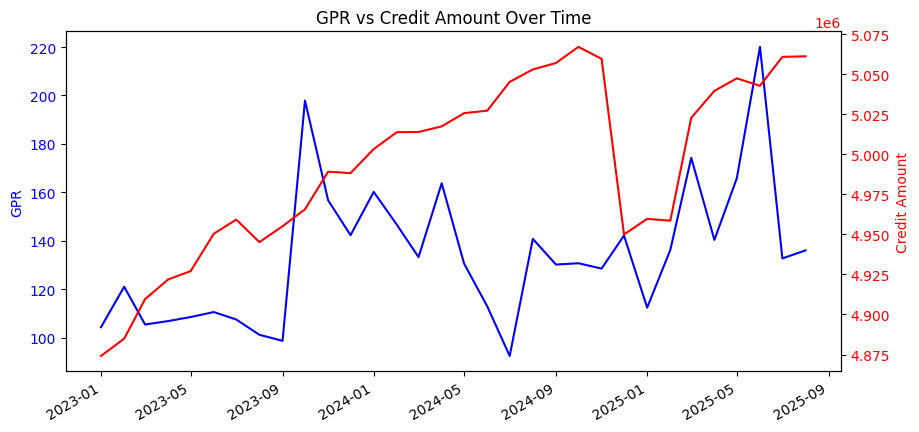

In [ ]:
fig, ax1 = plt.subplots(figsize=(10,5))

# Plot GPR
ax1.plot(merged_df['date'], merged_df['GPR'], color='blue', label='GPR')
ax1.set_ylabel('GPR', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Credit on secondary axis
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['TOTALSL'], color='red', label='Credit')
ax2.set_ylabel('Credit Amount', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.autofmt_xdate()
plt.title('GPR vs Credit Amount Over Time')
plt.show()

In [ ]:
merged_df[['GPR','TOTALSL']].corr()

,GPR,TOTALSL
GPR,1.000000,0.389898
TOTALSL,0.389898,1.000000


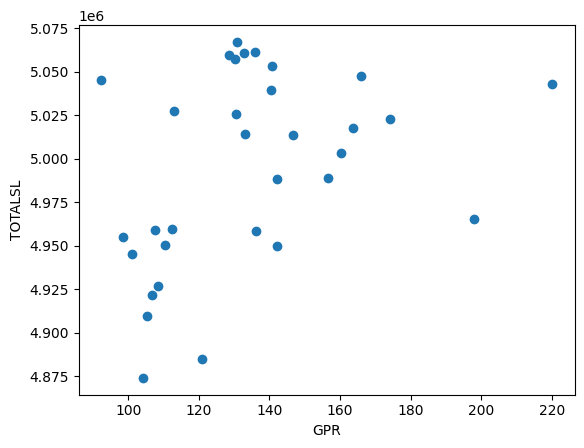

In [ ]:
plt.scatter(merged_df['GPR'], merged_df['TOTALSL'])
plt.xlabel('GPR')
plt.ylabel('TOTALSL')
plt.show()


In [ ]:
import statsmodels.api as sm

X = merged_df['GPR']
y = merged_df['TOTALSL']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TOTALSL   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     5.378
Date:                Tue, 21 Oct 2025   Prob (F-statistic):             0.0274
Time:                        06:09:46   Log-Likelihood:                -391.86
No. Observations:                  32   AIC:                             787.7
Df Residuals:                      30   BIC:                             790.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.894e+06   4.41e+04    111.064      0.000     4.8e+06    4.98e+06
GPR          745.4523    321.440      2.319      0.027      88.983    1401.921
==============================================================================
Omnibus:                        1.552   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.041
Skew:                          -0.090   Prob(JB):                        0.594
Kurtosis:                       2.135   Cond. No.                         657.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""